# <font color='#DB9E1E'>**Predicting Adolescent Births in Ghana**</font> 

<div style='text-align: center'>
    <img src='https://www.unicef.org/ghana/sites/unicef.org.ghana/files/styles/media_large_image/public/DSC06206.jpg.webp?itok=08zzv-BF' alt='teengirls' title='loss' width='900' height='600'/>
</div>

## Background
This goal of this notebook is to use machine learning methods (specifically Classification), to predict adolescent birth in Ghana. Between 2016 and 2020, Ghana recorded 542,131 pregnancies amongst adolescent girls aged 15-19 years and 13,444 pregnancies amongst young teenagers aged 10-14 years according to the Ghana Health Service District Health Information Management Health System (DHIMS). 

Giving birth as an adolescent can have life-time consequences on the adolescents as well as their children. It can lead to psychological and emotional troubles, disruption in educational aspirations, drift into livelihood challenges aggravating generational poverty, discrimination and stigmatization as well as loss of family and social ties in some cases. 

This analysis will allow us to predict women who are likely to give birth in their teens. This can help to focus both government and private efforts to reduce adolescent pregnancy and births, and improve health, educational, and social outcomes for girls. 

I use the 2022 wave of the Demographic and Health Surveys (DHS) data for Ghana. The DHS collects nationally representative demographic and health data on women between the ages of 15-49. Specifically, we use the *births* dataset, which contains information on all the children ever born to a women. The data extracted and used for this analysis focuses on the *first birth* of the woman.


## Data Preprocessing

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# import and view dataset
df = pd.read_csv('Teenbirth.csv')
df.head()

,caseid,v012,v013,v023,v024,v025,v044,v106,v130,v131,...,v463c,v481,v501,v502,v503,v504,v505,v506,v531,v731
0,1 6 2,20,20-24,"western, rural",western,rural,woman selected and interviewed,secondary,pentecostal/charismatic,akan,...,no,yes,never in union,never in union,NaN,NaN,NaN,NaN,10,in the past year
1,1 9 2,31,30-34,"western, rural",western,rural,woman not selected,secondary,pentecostal/charismatic,akan,...,no,yes,living with partner,currently in union/living with a man,more than once,living with her,no other wives,NaN,18,in the past year
2,1 13 2,33,30-34,"western, rural",western,rural,woman not selected,secondary,catholic,akan,...,no,yes,living with partner,currently in union/living with a man,once,living with her,no other wives,NaN,22,currently working
3,1 32 1,45,45-49,"western, rural",western,rural,woman not selected,secondary,pentecostal/charismatic,akan,...,no,yes,no longer living together/separated,formerly in union/living with a man,once,NaN,NaN,NaN,17,no
4,1 35 1,43,40-44,"western, rural",western,rural,woman selected and interviewed,secondary,pentecostal/charismatic,akan,...,no,yes,divorced,formerly in union/living with a man,once,NaN,NaN,NaN,18,currently working


In [3]:
# Check shape of the dataframe
df.shape

(10356, 32)

In [4]:
# Drop variables that are not relevant to our analysis
drop_columns = ['caseid', 'v023', 'v044', 'v133', 'v136', 'v149', 'v151', 'v152', 'v191', 'v201', 
                'v208', 'v463a', 'v463c', 'v481', 'v503', 'v504', 'v502', 'v505', 'v506', 'v731']
df.drop(columns=drop_columns, inplace=True)

# Check shape of dataframe again
df.shape

(10356, 12)

In [5]:
df.head()

,v012,v013,v024,v025,v106,v130,v131,v190,v212,v249,v501,v531
0,20,20-24,western,rural,secondary,pentecostal/charismatic,akan,middle,13,11,never in union,10
1,31,30-34,western,rural,secondary,pentecostal/charismatic,akan,poorer,20,16,living with partner,18
2,33,30-34,western,rural,secondary,catholic,akan,richer,27,17,living with partner,22
3,45,45-49,western,rural,secondary,pentecostal/charismatic,akan,poorer,24,15,no longer living together/separated,17
4,43,40-44,western,rural,secondary,pentecostal/charismatic,akan,richest,23,16,divorced,18


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10356 entries, 0 to 10355
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v012    10356 non-null  int64 
 1   v013    10356 non-null  object
 2   v024    10356 non-null  object
 3   v025    10356 non-null  object
 4   v106    10356 non-null  object
 5   v130    10356 non-null  object
 6   v131    10356 non-null  object
 7   v190    10356 non-null  object
 8   v212    10356 non-null  int64 
 9   v249    10356 non-null  object
 10  v501    10356 non-null  object
 11  v531    10356 non-null  object
dtypes: int64(2), object(10)
memory usage: 971.0+ KB


We see from the result of `df.info()` that there are no missing values for any of our variables, and that most of them are non-numeric. We will now rename the columns to allow for easier identification.

In [7]:
# Renaming columns for easier identification
column_names = {
    'v012': 'current age',
    'v013': 'age group',
    'v024': 'region',
    'v025': 'rural/urban',
    'v106': 'highest education',
    'v130': 'religion',
    'v131': 'ethnic group',
    'v190': 'wealth category',
    'v212': 'age at 1st birth',
    'v249': 'age at 1st menses',
    'v501': 'marital status',
    'v531': 'age at 1st sex'
}

df.rename(columns=column_names, inplace=True)

# View dataframe
df.head()

,current age,age group,region,rural/urban,highest education,religion,ethnic group,wealth category,age at 1st birth,age at 1st menses,marital status,age at 1st sex
0,20,20-24,western,rural,secondary,pentecostal/charismatic,akan,middle,13,11,never in union,10
1,31,30-34,western,rural,secondary,pentecostal/charismatic,akan,poorer,20,16,living with partner,18
2,33,30-34,western,rural,secondary,catholic,akan,richer,27,17,living with partner,22
3,45,45-49,western,rural,secondary,pentecostal/charismatic,akan,poorer,24,15,no longer living together/separated,17
4,43,40-44,western,rural,secondary,pentecostal/charismatic,akan,richest,23,16,divorced,18


### Metadata information on columns
- `current age`: current age of the woman
- `age group`: current age in 5-year groups
- `region`: current region of residence
- `rural/urban`: the type of residece (whether rural or urban)
- `highest education`: the highest educational level attended
- `religion`: woman's religion
- `ethnic group`: woman's ethnic group
- `wealth category`: wealth category of woman's household
- `age at 1st birth`: woman's age when she gave birth to first child
- `age at 1st menses`: woman's age at first menstrual period
- `marital status`: whether woman is currently or was formerly in a union, or has never been in a union
- `age at 1st sex`: woman's age at first sexual intercourse

We examine the unique values of the variables to ensure that we have the appropriate categories for categorical variables, and also to confirm that there are no numeric variables that may have mistakenly designated as non-numeric.

In [8]:
# Check unique values of religion
df['religion'].unique()

array(['pentecostal/charismatic', 'catholic', 'methodist', 'islam',
       'no religion', 'other christian', 'anglican', 'presbyterian',
       'other', 'traditional/spiritualist'], dtype=object)

In [9]:
# Check unique values of martial status
df['marital status'].unique()

array(['never in union', 'living with partner',
       'no longer living together/separated', 'divorced', 'married',
       'widowed'], dtype=object)

Before going further, we see that there are many categories in `religion` and `marital status` that can be grouped under a single category. We therefore group all the different christian denominations into a single `christian` category. We also re-group the `marital status` column to consist of `married/in union`, `never in union`, and `not currently in union`.

In [10]:
import warnings
warnings.simplefilter('ignore')

christian = ['pentecostal/charismatic', 'catholic', 'methodist', 'other christian', 'anglican', 'presbyterian']

# Replace all Christian denominations with `christian`
for n in christian:
    df['religion'][df['religion']==n] = 'christian'

# Check unique values of religion again
df['religion'].unique()

array(['christian', 'islam', 'no religion', 'other',
       'traditional/spiritualist'], dtype=object)

In [11]:
import warnings
warnings.simplefilter('ignore')

in_union_yes = ['married', 'living with partner']
in_union_no = ['no longer living together/separated', 'divorced', 'widowed']

# Reduce the number of categories for marital status variable
for y in in_union_yes:
    df['marital status'][df['marital status']==y] = 'married/in union'
                         
for n in in_union_no:
    df['marital status'][df['marital status']==n] = 'not currently in union'

# Check unique values of marital status again
df['marital status'].unique()

array(['never in union', 'married/in union', 'not currently in union'],
      dtype=object)

In [12]:
# Check unique values of age group
df['age group'].unique()

array(['20-24', '30-34', '45-49', '40-44', '25-29', '35-39', '15-19'],
      dtype=object)

In [13]:
# Check unique values of ethnic group
df['ethnic group'].unique()

array(['akan', 'grusi', 'other', 'ewe', 'mole-dagbani', 'ga/dangme',
       'mande', 'gurma', 'guan'], dtype=object)

In [14]:
# Check unique values of education
df['highest education'].unique()

array(['secondary', 'no education', 'primary', 'higher'], dtype=object)

In [15]:
# Check unique values of region
df['region'].unique()

array(['western', 'central', 'greater accra', 'volta', 'eastern',
       'ashanti', 'western north', 'ahafo', 'bono', 'bono east', 'oti',
       'northern', 'savannah', 'north east', 'upper east', 'upper west'],
      dtype=object)

In [16]:
# Check unique values of rural-urban
df['rural/urban'].unique()

array(['rural', 'urban'], dtype=object)

In [17]:
# Check unique values of wealth category
df['wealth category'].unique()

array(['middle', 'poorer', 'richer', 'richest', 'poorest'], dtype=object)

In [18]:
# Check unique values of age at 1st sex
df['age at 1st sex'].unique()

array(['10', '18', '22', '17', '13', '19', '11', '15', '14', '21', '25',
       '20', '12', '16', '23', '24', '26', 'inconsistent', '28', '30',
       '27', '33', '32', '8', '31', '29', '9', '38'], dtype=object)

In [19]:
# Check unique values of age at 1st menses
df['age at 1st menses'].unique()

array(['11', '16', '17', '15', '14', '12', '13', '19', '10', '20', '9',
       '18', "don't know", '39', '21', '25', '23', '45', '31', '22',
       'never menstruated', '8', '49', '37', '24', '40', '7', '27', '30',
       '26'], dtype=object)

In [20]:
# Check unique values of age at 1st birth
df['age at 1st birth'].unique()

array([13, 20, 27, 24, 23, 22, 21, 16, 17, 15, 18, 19, 14, 33, 28, 30, 12,
       26, 25, 31, 29, 35, 36, 32, 37, 34, 38, 39, 40, 43, 44, 11, 41, 10,
       42], dtype=int64)

In [21]:
# Check unique values of current age
df['current age'].unique()

array([20, 31, 33, 45, 43, 25, 37, 35, 34, 27, 29, 32, 40, 26, 39, 36, 49,
       30, 48, 44, 18, 24, 28, 38, 23, 41, 47, 46, 22, 42, 21, 17, 19, 16,
       15], dtype=int64)

We see that `age at 1st sex` and `age at 1st menses` are actually numeric. However, categories that were included to capture inconsistent responses had caused their type to be changed to non-numeric. We drop the observations that have non-numeric values for age, and convert the column to integer.

In [22]:
# Drop the observations marked as `inconsistent`
df.drop(df[df['age at 1st sex']=='inconsistent'].index, inplace=True)

# Convert column to integer 
df['age at 1st sex'] = df['age at 1st sex'].astype(int)
df['age at 1st sex'].dtype

dtype('int32')

In [23]:
# Check age at first sex again
df['age at 1st sex'].unique()

array([10, 18, 22, 17, 13, 19, 11, 15, 14, 21, 25, 20, 12, 16, 23, 24, 26,
       28, 30, 27, 33, 32,  8, 31, 29,  9, 38])

In [24]:
# Drop the observations marked as `don't know` and `never menstruated`
df.drop(df[df['age at 1st menses']=="don't know"].index, inplace=True)
df.drop(df[df['age at 1st menses']=="never menstruated"].index, inplace=True)

# Convert to integer column
df['age at 1st menses'] = df['age at 1st menses'].astype(int)
df['age at 1st menses'].dtype

dtype('int32')

In [25]:
# Check unique values of age at first menses
df['age at 1st menses'].unique()

array([11, 16, 17, 15, 14, 12, 13, 19, 10, 20,  9, 18, 39, 21, 25, 23, 45,
       31, 22,  8, 49, 37, 24, 40,  7, 27, 30, 26])

In [26]:
# Check summary statistics for numeric variables
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
current age,10018.0,33.478339,8.247481,15.0,27.0,33.0,40.0,49.0
age at 1st birth,10018.0,20.881713,4.200439,10.0,18.0,20.0,23.0,44.0
age at 1st menses,10018.0,14.982631,1.986854,7.0,14.0,15.0,16.0,49.0
age at 1st sex,10018.0,17.192953,2.953738,8.0,15.0,17.0,19.0,38.0


### Dealing with Outliers

`current age` is within the range of ages of women interviewed for the DHS. However, for `age at 1st birth`, we notice that we have a value as low as 10. We also see that the maximum for `age at 1st menses` is 49. These values are quite unusual, and give a hint that we may require an examination of outliers in our numeric variables.

In [27]:
variables = ['age at 1st menses', 'age at 1st birth']
names = ['menses', 'birth']

for var, name in zip(variables, names):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Age at first {name}")
    print('-'*35)
    print("Q1 (25th percentile):", Q1)
    print("Q3 (75th percentile):", Q3)
    print("IQR (Interquartile Range):", IQR)
    print("Lower Bound (Q1 - 1.5 * IQR):", lower_bound)
    print("Upper Bound (Q3 + 1.5 * IQR):", upper_bound)
    print('-'*35,"\n")

Age at first menses
-----------------------------------
Q1 (25th percentile): 14.0
Q3 (75th percentile): 16.0
IQR (Interquartile Range): 2.0
Lower Bound (Q1 - 1.5 * IQR): 11.0
Upper Bound (Q3 + 1.5 * IQR): 19.0
----------------------------------- 

Age at first birth
-----------------------------------
Q1 (25th percentile): 18.0
Q3 (75th percentile): 23.0
IQR (Interquartile Range): 5.0
Lower Bound (Q1 - 1.5 * IQR): 10.5
Upper Bound (Q3 + 1.5 * IQR): 30.5
----------------------------------- 



In [28]:
for var, name in zip(variables, names):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_iqr = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    df.drop(outliers_iqr.index, inplace=True)

# Examine shape of data after dropping outliers
df.shape

(9537, 12)

### Visualizing Numeric Variables

<Axes: >

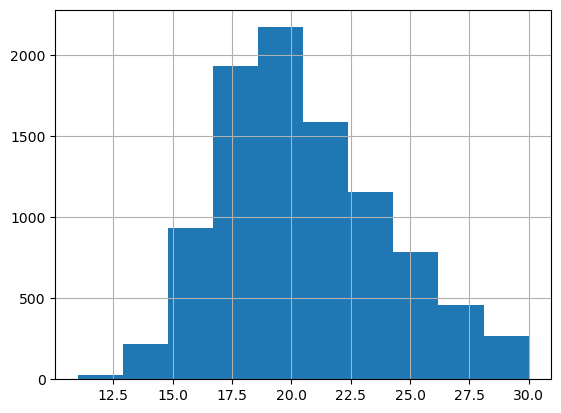

In [29]:
df['age at 1st birth'].hist()

<Axes: >

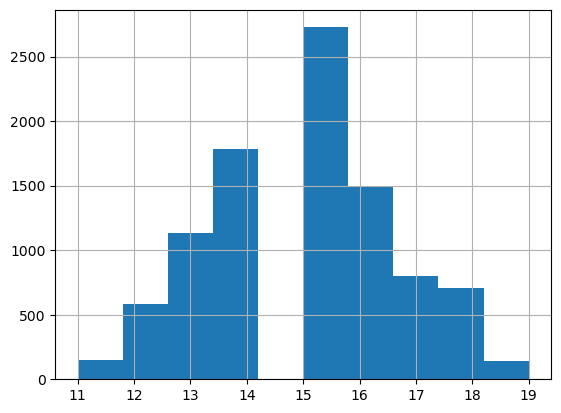

In [30]:
df['age at 1st menses'].hist()

<Axes: >

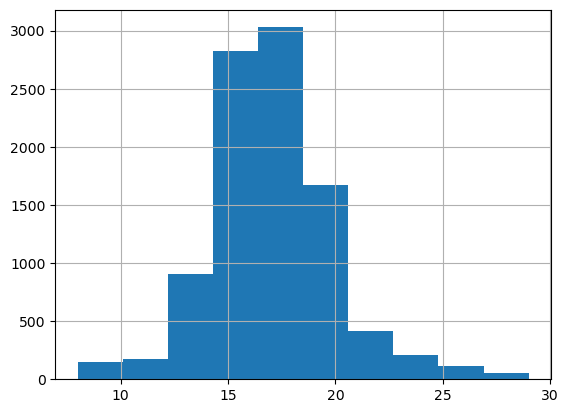

In [31]:
df['age at 1st sex'].hist()

The graphs show that most of the women had their first child between 17 and 24, and had their first menstrual period between 13 and 18. The majority of women in the sample also had their first sexual intercourse when they were between 14 and 21 years old.

### Creating Target Variable

In [32]:
# Create target variable
def teen_birth_label(row):
    # teen birth defined as birth at age 19 or below
    if row['age at 1st birth'] <= 19:
        return 'yes'
    else:
        return 'no'
    
df['teen birth'] = df.apply(teen_birth_label, axis=1)

In [33]:
# Check that the labels of `teen birth` and `age at 1st birth` correspond
print('No. of rows where age at first birth <= 19:', len(df[df['age at 1st birth'] <= 19]))
print('No. of rows where teen birth is yes:', len(df[df['teen birth']=='yes']))

No. of rows where age at first birth <= 19: 4168
No. of rows where teen birth is yes: 4168


In [34]:
# Check if `teen birth`` has the right labels
df[['age at 1st birth', 'teen birth']].head()

,age at 1st birth,teen birth
0,13,yes
1,20,no
2,27,no
3,24,no
4,23,no


### Visualizing Categorical Variables

<Figure size 700x500 with 0 Axes>

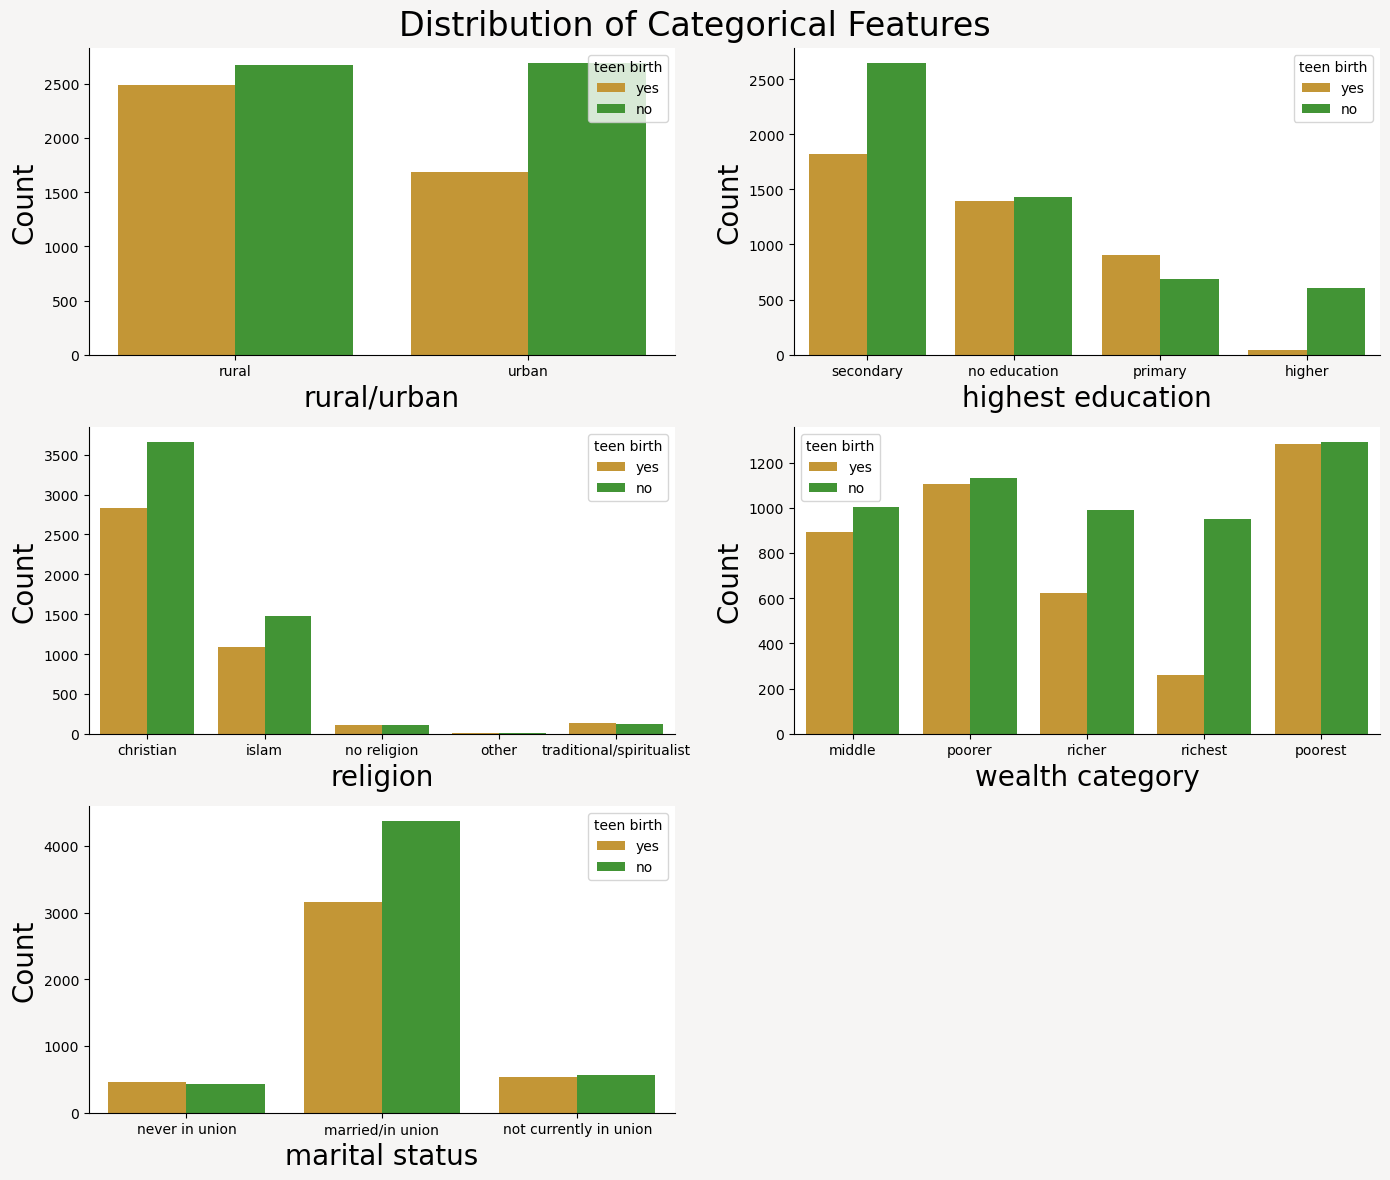

In [35]:
# Create list of categorical features
cat_feats = ['rural/urban', 'highest education', 'religion', 'wealth category', 'marital status']

# Define your color palette
mypal = ['#DB9E1E', '#37A425']
#DB9E1E #D9B418
# Initialize the matplotlib figure with a specific size and background color
plt.figure(figsize=(7, 5), facecolor='#F6F5F4')

L = len(cat_feats)
ncol = 2
nrow = int(np.ceil(L / ncol))

fig, axs = plt.subplots(nrow, ncol, figsize=(14, 12), facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92)

# Flatten the axs array for easy indexing
axs = axs.flatten()

for i, col in enumerate(cat_feats):
    sns.countplot(data=df, x=col, hue='teen birth', palette=mypal, ax=axs[i])

    axs[i].set_xlabel(col, fontsize=20)
    axs[i].set_ylabel('Count', fontsize=20)
    sns.despine(right=True, ax=axs[i])

# Remove any unused axes if num_feats is odd
if L % 2 != 0:
    fig.delaxes(axs[-1])

plt.suptitle('Distribution of Categorical Features', fontsize=24)
plt.tight_layout()
plt.show()

We see a much wider difference between the number adolescent mothers and non-adolescent mothers in urban areas compared to rural areas. There is also a much wider gap for women who have completed secondary school or higher education compared to those with no education or only primary education. A similar pattern applies to the wealth categories: there is a wider gap for women from rich households than poor households.

Another thing we notice from the above graphs is that there are still categories that can be merged, since they have very similar characteristics in terms of their distribution, and therefore are not likely to significantly affect the predictions of the model.

In [36]:
import warnings
warnings.simplefilter('ignore')

educ = ['primary', 'no education']
religion = ['no religion', 'traditional/spiritualist']
wealth = ['poorer', 'poorest', 'richer', 'richest']

# Group `no religion` and `traditionalist` with `other` 
for n in religion:
    df['religion'][df['religion']==n] = 'other'

# Group `primary` and `no education` in a single category
for n in educ:
    df['highest education'][df['highest education']==n] = 'none/primary'

# Group `poorest` and `poorer` under poor; `richest` and `richer` under `rich`
for w in wealth:
    if w in [wealth[0], wealth[1]]:
        df['wealth category'][df['wealth category']==w] = 'poor'
    elif w in [wealth[2], wealth[3]]:
        df['wealth category'][df['wealth category']==w] = 'rich'



print(df['religion'].unique())
print(df['wealth category'].unique())
print(df['highest education'].unique())

['christian' 'islam' 'other']
['middle' 'poor' 'rich']
['secondary' 'none/primary' 'higher']


<Figure size 700x500 with 0 Axes>

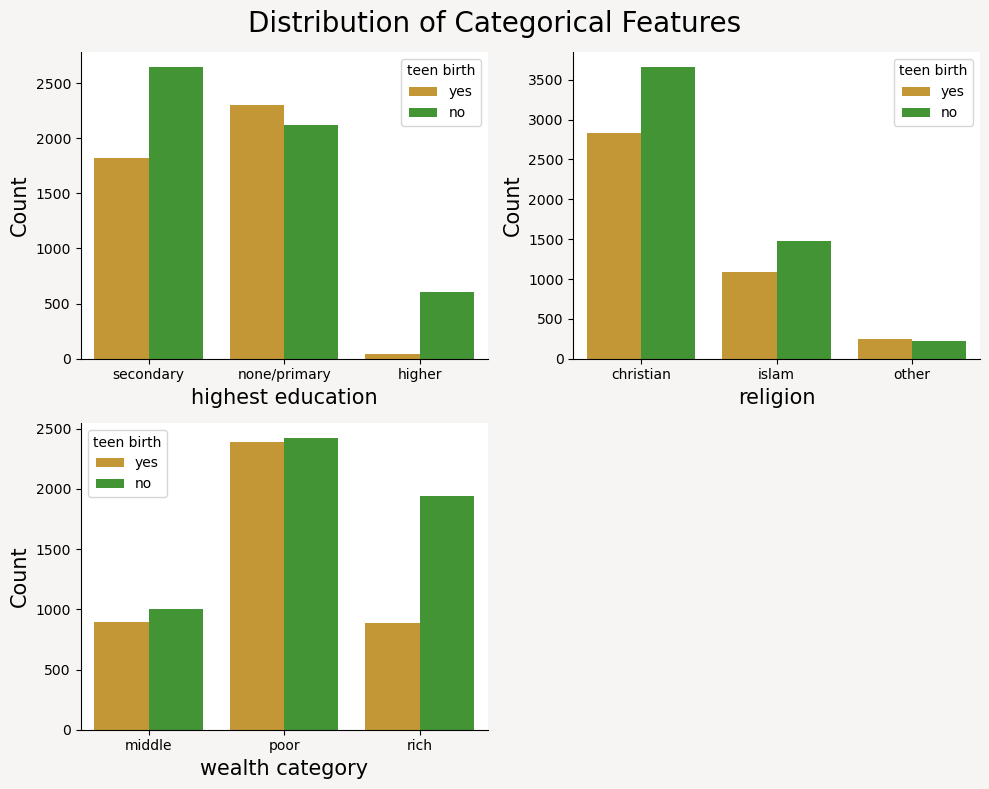

In [37]:
# Create list of categorical features
new_feats = ['highest education', 'religion', 'wealth category']

# Define your color palette
mypal = ['#DB9E1E', '#37A425']

# Initialize the matplotlib figure with a specific size and background color
plt.figure(figsize=(7, 5), facecolor='#F6F5F4')

L = len(new_feats)
ncol = 2
nrow = int(np.ceil(L / ncol))

fig, axs = plt.subplots(nrow, ncol, figsize=(10, 8), facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92)

# Flatten the axs array for easy indexing
axs = axs.flatten()

for i, col in enumerate(new_feats):
    sns.countplot(data=df, x=col, hue='teen birth', palette=mypal, ax=axs[i])

    axs[i].set_xlabel(col, fontsize=15)
    axs[i].set_ylabel('Count', fontsize=15)
    sns.despine(right=True, ax=axs[i])

# Remove any unused axes if num_feats is odd
if L % 2 != 0:
    fig.delaxes(axs[-1])

plt.suptitle('Distribution of Categorical Features', fontsize=20)
plt.tight_layout()
plt.show()

We now visualize the distribution by `region` and `ethnic group`.

<Figure size 700x500 with 0 Axes>

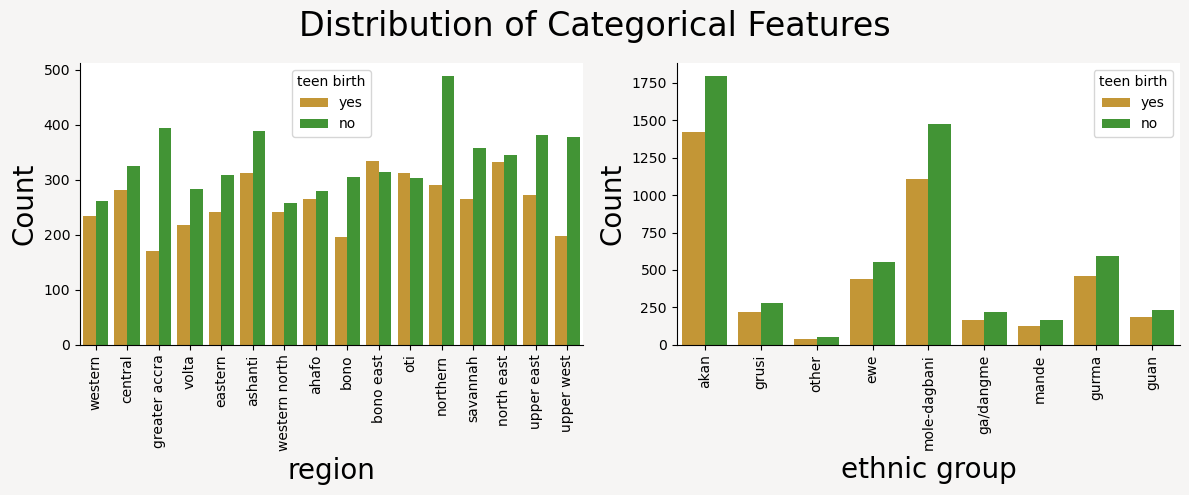

In [38]:
cat_feats2 = ['region', 'ethnic group']

# Initialize the matplotlib figure with a specific size and background color
plt.figure(figsize=(7, 5), facecolor='#F6F5F4')

L = len(cat_feats2)
ncol = 2
nrow = int(np.ceil(L / ncol))

fig, axs = plt.subplots(nrow, ncol, figsize=(12, 5), facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92)

# Flatten the axs array for easy indexing
axs = axs.flatten()

for i, col in enumerate(cat_feats2):
    sns.countplot(data=df, x=col, hue='teen birth', palette=mypal, ax=axs[i])

    axs[i].tick_params(axis='x', labelrotation=90)
    axs[i].set_xlabel(col, fontsize=20)
    axs[i].set_ylabel('Count', fontsize=20)
    sns.despine(right=True, ax=axs[i])

# Remove any unused axes if num_feats is odd
if L % 2 != 0:
    fig.delaxes(axs[-1])

plt.suptitle('Distribution of Categorical Features', fontsize=24)
plt.tight_layout()
plt.show()

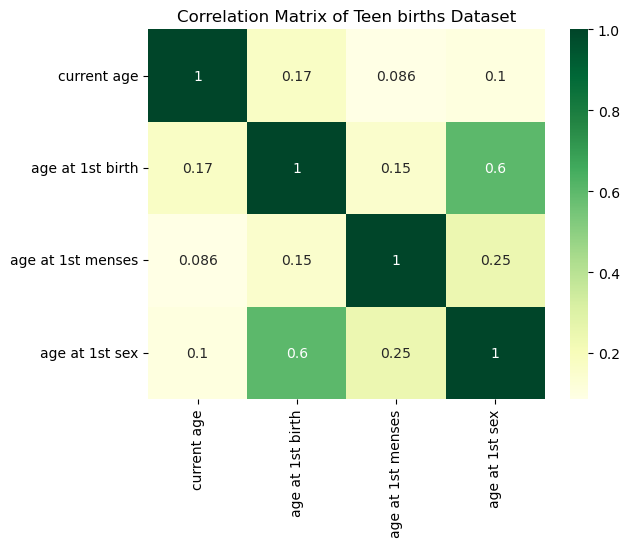

In [39]:
# Creating correlation matrix
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='YlGn')
plt.title('Correlation Matrix of Teen births Dataset')
plt.show()

The correlation matrix shows high correlation between `age at 1st sex` and `age at 1st birth`, which is a relationship we expect. This also means that `age at 1st sex` will be highly correlated with the target variable `teen birth`.

In [40]:
# Summary statistics of numeric variables by target categories
df.groupby('teen birth')[['current age', 'age at 1st menses', 'age at 1st sex']].mean()

,current age,age at 1st menses,age at 1st sex
teen birth,,,
no,34.218663,15.158130,18.343453
yes,32.023033,14.652591,15.508397


Average `age at 1st sex` is almost 3 years lower for women who had their first child when they were adolescents. Women who had their first child when they were adolescents are also, on average, younger.

## Modelling

In [41]:
# import required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

In [42]:
# Drop `age at 1st birth` and `age group`
df.drop(columns=['age at 1st birth', 'age group'], inplace=True)
df.head()

,current age,region,rural/urban,highest education,religion,ethnic group,wealth category,age at 1st menses,marital status,age at 1st sex,teen birth
0,20,western,rural,secondary,christian,akan,middle,11,never in union,10,yes
1,31,western,rural,secondary,christian,akan,poor,16,married/in union,18,no
2,33,western,rural,secondary,christian,akan,rich,17,married/in union,22,no
3,45,western,rural,secondary,christian,akan,poor,15,not currently in union,17,no
4,43,western,rural,secondary,christian,akan,rich,16,not currently in union,18,no


In [43]:
# Encoding categorical variables
df = pd.get_dummies(df, columns=['rural/urban', 'highest education', 'wealth category',
                                'region', 'ethnic group', 'marital status', 'religion'], drop_first=True)
df.head()

,current age,age at 1st menses,age at 1st sex,teen birth,rural/urban_urban,highest education_none/primary,highest education_secondary,wealth category_poor,wealth category_rich,region_ashanti,...,ethnic group_grusi,ethnic group_guan,ethnic group_gurma,ethnic group_mande,ethnic group_mole-dagbani,ethnic group_other,marital status_never in union,marital status_not currently in union,religion_islam,religion_other
0,20,11,10,yes,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,31,16,18,no,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,33,17,22,no,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,45,15,17,no,False,False,True,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,43,16,18,no,False,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [44]:
# Splitting the dataset into features and target variable
X = df.drop(['teen birth'], axis=1)
y = df['teen birth']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Cross Validation

In [45]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.76928839 0.74831461 0.75280899 0.74157303 0.73932584]
0.7502621722846442


In [46]:
dt = DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.67940075 0.68764045 0.70037453 0.71235955 0.67490637]
0.690936329588015


In [47]:
knn = KNeighborsClassifier(n_neighbors=4)
cv = cross_val_score(knn, X_train.values, y_train, cv=5, error_score='raise')
print(cv)
print(cv.mean())

[0.7093633  0.70861423 0.71235955 0.71235955 0.70337079]
0.7092134831460675


In [48]:
svc = SVC(probability = True)
cv = cross_val_score(svc, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.75955056 0.75355805 0.76479401 0.74531835 0.7340824 ]
0.7514606741573034


`Logistic regression` and `SVM` have the best cross validation scores among the classification methods used.

### Using GridSearchCV to obtain best model parameters

In [49]:
# import required library
from sklearn.model_selection import GridSearchCV 

In [50]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [51]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


Logistic Regression
Best Score: 0.7510112359550563
Best Parameters: {'C': 4.281332398719396, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


In [52]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train,y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits


KNN
Best Score: 0.7393258426966292
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 2, 'weights': 'distance'}


In [117]:
svc = SVC()
param_grid = {'kernel': ['rbf','linear'], 
                'C': [.1, 1, 10, 100, 1000]}

clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


I interrupted the SVC because it was taking too long to run and my laptop was starting to heat up.

In [53]:
dt = DecisionTreeClassifier(random_state=1)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [15, 20, 25],
    'max_features': ['auto', 'sqrt', 10],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [2, 3]
}

clf_dt = GridSearchCV(dt, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
best_clf_dt = clf_dt.fit(X_train, y_train)
clf_performance(best_clf_dt, 'Decision Tree')

Fitting 5 folds for each of 72 candidates, totalling 360 fits


Decision Tree
Best Score: 0.7282397003745318
Best Parameters: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 2}


In [54]:
# Make predictions using trained models
y_pred_lr = clf_lr.best_estimator_.predict(X_test)
y_pred_knn = clf_knn.best_estimator_.predict(X_test)
y_pred_dt = clf_dt.best_estimator_.predict(X_test)

### Model Evaluation

In [55]:
# Evaluate each model
models = [clf_lr, clf_dt, clf_knn]
model_names = ['Logistic Regression', 'Decision Tree', 'KNN']
predictions = [y_pred_lr, y_pred_dt, y_pred_knn]

for model, name, yhat in zip(models, model_names, predictions):
    #y_pred = model.predict(model)
    print(f'Results for {name}:')
    print('Accuracy:', accuracy_score(y_test, yhat))
    print('Classification Report:')
    print(classification_report(y_test, yhat))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test,yhat))
    print('-' * 55)

Results for Logistic Regression:
Accuracy: 0.7564640111809923
Classification Report:
              precision    recall  f1-score   support

          no       0.79      0.79      0.79      1646
         yes       0.72      0.71      0.71      1216

    accuracy                           0.76      2862
   macro avg       0.75      0.75      0.75      2862
weighted avg       0.76      0.76      0.76      2862

Confusion Matrix:
[[1306  340]
 [ 357  859]]
-------------------------------------------------------
Results for Decision Tree:
Accuracy: 0.7407407407407407
Classification Report:
              precision    recall  f1-score   support

          no       0.80      0.74      0.77      1646
         yes       0.68      0.74      0.71      1216

    accuracy                           0.74      2862
   macro avg       0.74      0.74      0.74      2862
weighted avg       0.75      0.74      0.74      2862

Confusion Matrix:
[[1216  430]
 [ 312  904]]
------------------------------------

Generally, the model performs well in predicting whether or not a woman has her first child in adolescence. Accuracy ranges from 0.73 for Decision Tree to 0.76 for the Logistic Regression.

## Conclusion
This analysis has created a classification algorithm that can be used to predict the risk of adolescent birth among young girls in Ghana. The prediction accuracy of 76% (for Logistic regression) is commendable. However, if additional variables such as those related to household characteristics like parents' education and others were available, they could help to make the model's predictions more precise.